## Introduction
When you are planning to visit a major city, such as munich, finding a suitable and affordable accommodation is often tedius. But what are the main affects that influence prices? Is it the particular part of the city, the distance to the clostest underground station, the time of the year, the simultaneous occurance of trading fairs, Oktoberfest, ratings and reviews of an accommodation or simply the amenities provided by the host? Is it possible to save some money without losing comfort?

I will try to answer these questions by analysing the [AirBnB](https://www.kaggle.com/datasets/chriskue/munich-airbnb-data) data available for munich from [Kaggle](https://www.kaggle.com/). There is lots of additional AirBnB data available on kaggle. I decided to use munich, since I come from bavaria in the close proximity to the city.

In [1]:
# lets import the necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

### Let's break into the field
I was able to download 3 datasets for munich:
- calendar.csv: calender data for listings, like dates and prices 
- listings.csv: summary on listings, like location, host infos, fees, amenities
- reviews.csv: summy on reviews for the listings

So that's what we will have to work with.
Just to make sure let's post the important question in bold letters:

**What features influence the prices of AirBnB accommodation?**

As a starting point let us generate list of the possible questions that sprang to mind during the introduction:
- Part of the city
- Distance to clostest underground station
- Time of the year
- Simultaneous fairs (trading or Oktoberfest and the like)
- Ratings and reviews of the accommodation
- Size, number of rooms and beds etc
- Provided amenities


In the next step we will have a closer look at the data avaiable and check whether we are able to answer all or any of the provided questions.

In [2]:
# let's import the data and get an overview of what we have
calender_df = pd.read_csv('./calendar.csv')
listings_df = pd.read_csv('./listings.csv')
reviews_df = pd.read_csv('./reviews.csv')

C:\Users\dbdrzij\AppData\Local\Temp\ipykernel_17308\937749005.py:3: DtypeWarning: Columns (43,61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_df = pd.read_csv('./listings.csv')


In [3]:
calender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4190565 entries, 0 to 4190564
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           object
 4   adjusted_price  object
 5   minimum_nights  int64 
 6   maximum_nights  int64 
dtypes: int64(3), object(4)
memory usage: 223.8+ MB


In [4]:
calender_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,216529,2019-11-25,f,$150.00,$150.00,5,60
1,159634,2019-11-25,f,$53.00,$53.00,14,90
2,159634,2019-11-26,f,$53.00,$53.00,14,90
3,159634,2019-11-27,f,$53.00,$53.00,14,90
4,159634,2019-11-28,f,$53.00,$53.00,14,90


In [5]:
listings_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Data columns (total 106 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    id                                            11481 non-null  int64  
 1    listing_url                                   11481 non-null  object 
 2    scrape_id                                     11481 non-null  int64  
 3    last_scraped                                  11481 non-null  object 
 4    name                                          11459 non-null  object 
 5    summary                                       10863 non-null  object 
 6    space                                         7197 non-null   object 
 7    description                                   11178 non-null  object 
 8    experiences_offered                           11481 non-null  object 
 9    neighborhood_overview                         61

In [6]:
pd.set_option('display.max_columns', None)
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36720,https://www.airbnb.com/rooms/36720,20191125094942,2019-11-25,"Beautiful 2 rooms flat, Glockenbach","Very quiet, yet centrally located 2 rooms apt....","2-Zimmer Altbauwohung Beste Lage, zentral, im ...","Very quiet, yet centrally located 2 rooms apt....",none,Glockenbachviertel area has the hippest restau...,NaN,"Convenient public transport, walking distance ...",NaN,NaN,Please no smoking in the apartment (there is a...,NaN,NaN,https://a0.muscache.com/im/pictures/4e2a8e2e-d...,NaN,158413,https://www.airbnb.com/users/show/158413,Gabriela,2010-07-05,"Munich, Bavaria, Germany","Hi there, my name is Gabriela. I'm a big trave...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/158413/profil...,https://a0.muscache.com/im/users/158413/profil...,Ludwigsvorstadt - Isarvorstadt,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Munich, Bavaria, Germany",Ludwigsvorstadt - Isarvorstadt,Ludwigsvorstadt-Isarvorstadt,NaN,Munich,Bavaria,80469,Munich,"Munich, Germany",DE,Germany,48.13057,11.56929,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Futon,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",614.0,$95.00,$800.00,NaN,$100.00,$30.00,1,$30.00,2,730,2,2,730,730,2.0,730.0,28 months ago,t,0,0,0,0,2019-11-25,25,0,2014-05-09,2017-07-22,98.0,10.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.37
1,97945,https://www.airbnb.com/rooms/97945,20191125094942,2019-11-25,Deluxw-Apartm. with roof terrace,NaN,"We offer a modern, quiet apartment with a sunn...","We offer a modern, quiet apartment with a sunn...",none,We are living in a outskirt of Munich its call...,NaN,"Wir wohnen im Grünen und doch in Stadtnähe, Di...",Keine Gartenbenutzung. Öffentliche Parkplätze ...,Wir sind gern bereit unseren Gästen unsere Umg...,nichtraucher erwünscht,NaN,NaN,https://a0.muscache.com/im/pictures/2459996/10...,NaN,517685,https://www.airbnb.com/users/show/517685,Angelika,2011-04-18,"Munich, Bayern, Germany",Ich freue mich auf viele internationale Gäste!...,within a day,100%,NaN,t,https://a0.muscache.com/im/users/517685/profil...,https://a0.muscache.com/im/users/517685/profil...,Hadern,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Munich, Bavaria, Germany",Hadern,Hadern,NaN,Munich,Bavaria,81375,Munich,"Munich, German

In [7]:
listings_df['transit'].nunique()

6664

In [8]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175562 entries, 0 to 175561
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     175562 non-null  int64 
 1   id             175562 non-null  int64 
 2   date           175562 non-null  object
 3   reviewer_id    175562 non-null  int64 
 4   reviewer_name  175562 non-null  object
 5   comments       175488 non-null  object
dtypes: int64(3), object(3)
memory usage: 8.0+ MB


In [9]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,36720,12723661,2014-05-09,11840468,Mikhail,I would like to thank Gabriella as her apartme...
1,36720,13147830,2014-05-20,5466213,Kim,Gabriela's place was absolutely fantastic. It...
2,36720,16302574,2014-07-25,2062882,Juan R.,"Quiet place, open to a courtyard, with all the..."
3,36720,16428874,2014-07-27,1225618,David,The best Airbnb expeierence I've had. The apar...
4,36720,19478358,2014-09-13,13977301,Cal,"All first rate ! Beautiful apartment, comforta..."


## Identify useful data for the questions at hand

First of all, we will not use the reviews_df. It contains no valuable data.

Concerning the major data in listings_df, we can skip lots of information since it is not useful for the questions above.
From the might be useful columns, we will not use these:

```
summary # too many arbitrary descriptions to cluster
space # too many arbitrary descriptions to cluster
description # too many arbitrary descriptions to cluster
access # too many arbitrary descriptions to cluster
transit # too many arbitrary descriptions to cluster
...
```

However, these might be useful to answer our questions:
```
neighbourhood_cleansed
property_type
room_type
accommodates 
bathrooms
bedrooms
beds
amenities # lot's of different strings, but we might be able to clean it         
square_feet  
price                    
cleaning_fee    
minimum_nights                                                                                                               
number_of_reviews
review_scores_rating
```

## Recap: our business questions
How large is the influence on munich airbnb accommodation prices for
1. Neighbourhood of the city
2. Time of the year
3. Ratings and reviews of the accommodation
4. Size, number of rooms and beds etc
5. Provided amenities

~~ Distance to clostest underground station~~

~~ Simultaneous fairs (trading or Oktoberfest and the like ~~

## What's the price?
It still remains the questions, what we would like to predict? Essentially these prices occur:
```
price
weekly_price
monthly_price
security_deposit
cleaning_fee
```

Since weekly and monthly prices have lots of missing values and they correlate somehow to the price per day (`price`), we will ommit these. Since `security_deposit` will be refunded eventually, this too will not be taken into account. The **price** of interest will therefore contain `price` and `cleaning_fee`.

## Let's dig deeper into the data structure


In [10]:
#focus on relevant data only
listings_keys = ['neighbourhood_cleansed',
                'property_type',
                'room_type',
                'accommodates',
                'bathrooms',
                'bedrooms',
                'beds',
                'amenities',
                'square_feet',  
                'price',                    
                'cleaning_fee',    
                'minimum_nights',                                                                                                               
                'number_of_reviews',
                'review_scores_rating']

df = listings_df[listings_keys]

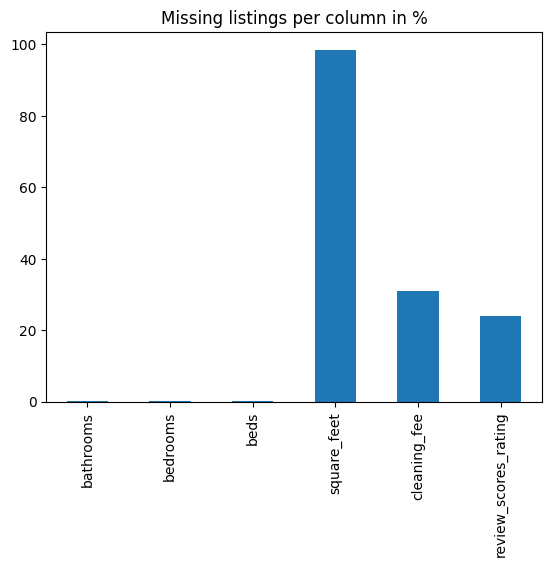

In [11]:
# find the percentage of missing values per column
missing_listings_df = df.isnull().mean()*100
missing_listings_df = missing_listings_df[missing_listings_df>0]
missing_listings_df.plot.bar(title='Missing listings per column in %');

Since most of the quare_feet data is missing, we will drop this feature aswell.

In [12]:
listings_keys = ['neighbourhood_cleansed',
                'property_type',
                'room_type',
                'accommodates',
                'bathrooms',
                'bedrooms',
                'beds',
                'amenities',
                'price',                    
                'cleaning_fee',    
                'minimum_nights',                                                                                                               
                'number_of_reviews',
                'review_scores_rating']
df = listings_df[listings_keys]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  11481 non-null  object 
 1   property_type           11481 non-null  object 
 2   room_type               11481 non-null  object 
 3   accommodates            11481 non-null  int64  
 4   bathrooms               11460 non-null  float64
 5   bedrooms                11451 non-null  float64
 6   beds                    11463 non-null  float64
 7   amenities               11481 non-null  object 
 8   price                   11481 non-null  object 
 9   cleaning_fee            7914 non-null   object 
 10  minimum_nights          11481 non-null  int64  
 11  number_of_reviews       11481 non-null  int64  
 12  review_scores_rating    8747 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.1+ MB


We have 7 columns with `numerical` values and 6 with `categorical` values.

In [13]:
min_date = calender_df['date'].min()
max_date = calender_df['date'].max()

print(f'The calender_df contains {calender_df.shape[0]} rows and the earliest date is {min_date} and latest {max_date}')

The calender_df contains 4190565 rows and the earliest date is 2019-11-25 and latest 2020-12-05


So we have roughly data encompassing a year. It should be able to answer question 2 adequately.

## Now let's move on to the data wrangling in earnest

In [14]:
# we want to clean the dataset, insert mode where possible, create dummy variables and so forth. 

# first, we merge the to dataframes
listings_df = listings_df.rename(index=str, columns={"id": "listing_id"})
df = pd.merge(calender_df, listings_df, on = 'listing_id')

In [15]:
df[['listing_id', 'date', 'price_x','adjusted_price','price_y']].loc[~(df['price_x'] == df['price_y'])].head()

,listing_id,date,price_x,adjusted_price,price_y
365,159634,2019-11-25,$53.00,$53.00,$55.00
366,159634,2019-11-26,$53.00,$53.00,$55.00
367,159634,2019-11-27,$53.00,$53.00,$55.00
368,159634,2019-11-28,$53.00,$53.00,$55.00
369,159634,2019-11-29,$53.00,$53.00,$55.00


Unfortunately there are 1.795.631 rows where the `price_x` and `price_y` don't match. This is due to the fact that we have many prices for different dates in the calender_df for the same accommodation. We will therefore use only `price_x` from now on.

In [16]:
# keep relevant features
listings_keys = ['listing_id',
                'neighbourhood_cleansed',
                'property_type',
                'room_type',
                'accommodates',
                'bathrooms',
                'bedrooms',
                'beds',
                'amenities',
                'price_x',                    
                'cleaning_fee',    
                'minimum_nights_x',                                                                                                               
                'number_of_reviews',
                'review_scores_rating',
                'date']
df = df[listings_keys]
df = df.rename(index=str, columns={"price_x": "price", "minimum_nights_x": "minimum_nights"})

In [17]:
# convert price and cleaning_fee columns to float instead of object
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '').str.replace(',', '').astype(float)

In [18]:
# convert date column to year and month and remove date column
df['month'] = df.apply(lambda row: int(row['date'].split('-')[1]), axis=1)
df['year']  = df.apply(lambda row: int(row['date'].split('-')[0]), axis=1)
df = df.drop(columns = ['date'])

In [19]:
# drop rows with missing values for price
df = df.dropna(subset=['price'], axis=0)

In [20]:
# Fill numeric columns with the mode
num_vars = df.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df[col].fillna((df[col].mode()[0]), inplace=True)

## Let's start with some visualizations

In [21]:
#find minimum, maximum and average price for listing
min_price = df['price'].min()
max_price = df['price'].max()
mean_price = df['price'].mean()

print('Minimum price per listing is %d $.' % (min_price))
print('Maximum price per listing is %d $' % (max_price))
print('Average price per listing is %d $.' % (mean_price))

Minimum price per listing is 9 $.
Maximum price per listing is 9039 $
Average price per listing is 113 $.


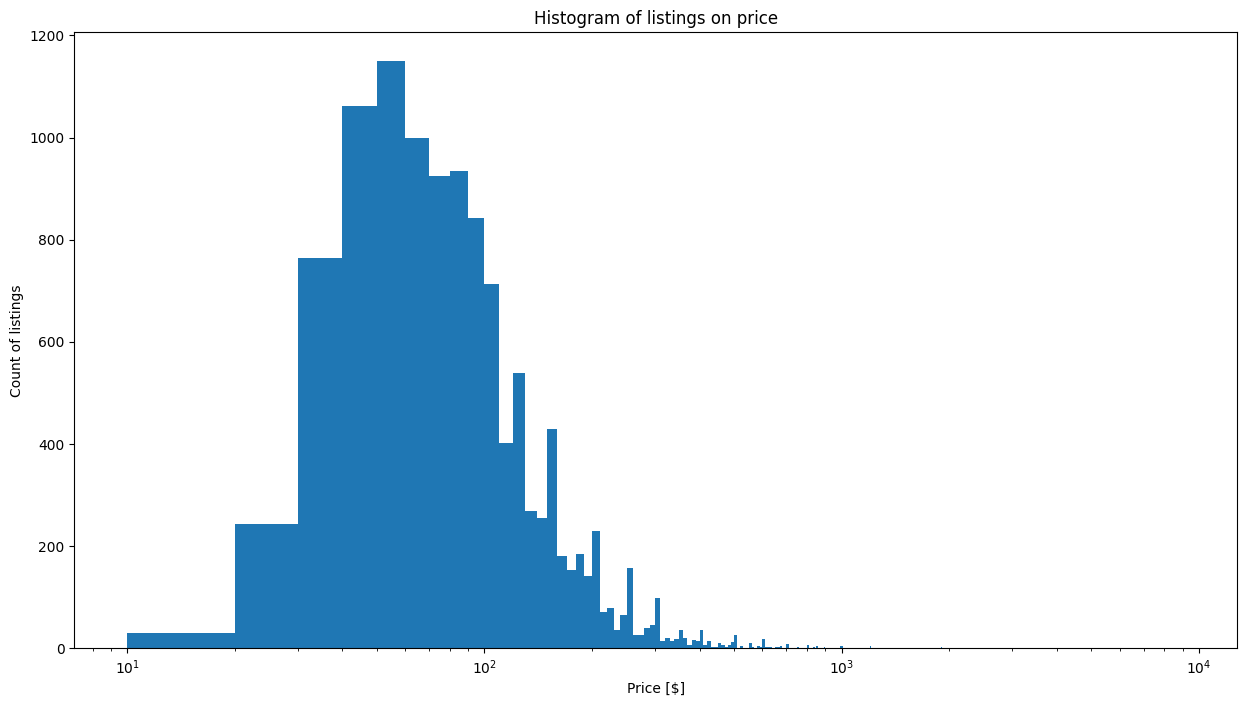

In [22]:
# average price per listing
price_mean_per_listing = df.groupby('listing_id').mean()['price']

plt.figure(figsize=(15,8))
bins = np.arange(0, ((max_price+99)//100) * 100, 10)
plt.hist(price_mean_per_listing, bins=bins)
plt.xticks([1e1, 1e2, 1e3, 1e4], ['10', '100', '1000', '10k'])
plt.xscale('log')
plt.xlabel('Price [$]')
plt.ylabel('Count of listings')
plt.title('Histogram of listings on price')
plt.savefig('Price_hist.jpg')
plt.show()

We have a highly right scewed distribution, with a few very high prices. The majority of prices are **between 30 and 200 $**.

## What is the busiest time of the year to visit munich? 
To answer the question we will check the number of listings and their price distribution depending on the calender information. 

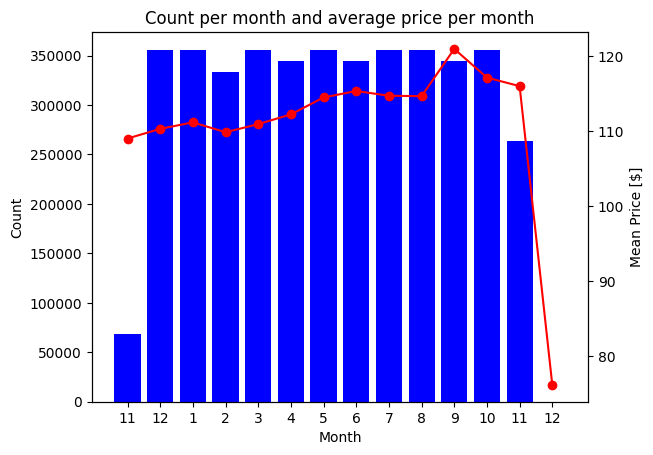

In [23]:
grouped = df.groupby(['year','month']).agg({'price': ['count', 'mean']}).reset_index()
grouped.columns = ['year', 'month', 'count', 'mean_price']
grouped

fig, ax1 = plt.subplots()
ax1.bar(grouped.index, grouped['count'], color='blue')
ax1.set_ylabel('Count')

ax2 = ax1.twinx()
ax2.plot(grouped.index, grouped['mean_price'], color='red', marker='o')
ax2.set_ylabel('Mean Price [$]')

ax1.set_xlabel('Month')
ax1.set_xticks(grouped.index)
ax1.set_xticklabels(grouped['month'])

plt.title('Count per month and average price per month')

plt.show()

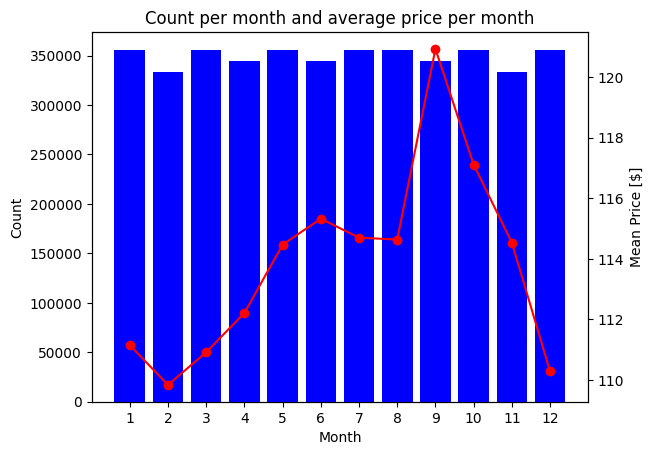

In [24]:
grouped = df.groupby(['month']).agg({'price': ['count', 'mean']}).reset_index()
grouped.columns = ['month', 'count', 'mean_price']
grouped

fig, ax1 = plt.subplots()
ax1.bar(grouped.index, grouped['count'], color='blue')
ax1.set_ylabel('Count')

ax2 = ax1.twinx()
ax2.plot(grouped.index, grouped['mean_price'], color='red', marker='o')
ax2.set_ylabel('Mean Price [$]')

ax1.set_xlabel('Month')
ax1.set_xticks(grouped.index)
ax1.set_xticklabels(grouped['month'])

plt.title('Count per month and average price per month')

plt.savefig('Count_MeanPrice_vs_Month.jpg')

plt.show()

As we can see the number of listings does not vary much during a year.
However the prices are during **winter cheapest**, the rise during spring and have a high **peak around september**. This might correlate with the occurance of the **Oktoberfest**, which took place in 2020 from september 19th to october 4th. Then the prices are falling again rapidly.

## How large is the influence of the neighbourhood?
It might be worth to show the results based on the month, since we saw a huge peak in the prices around september. Some areas of munich might be even more attractive at that season

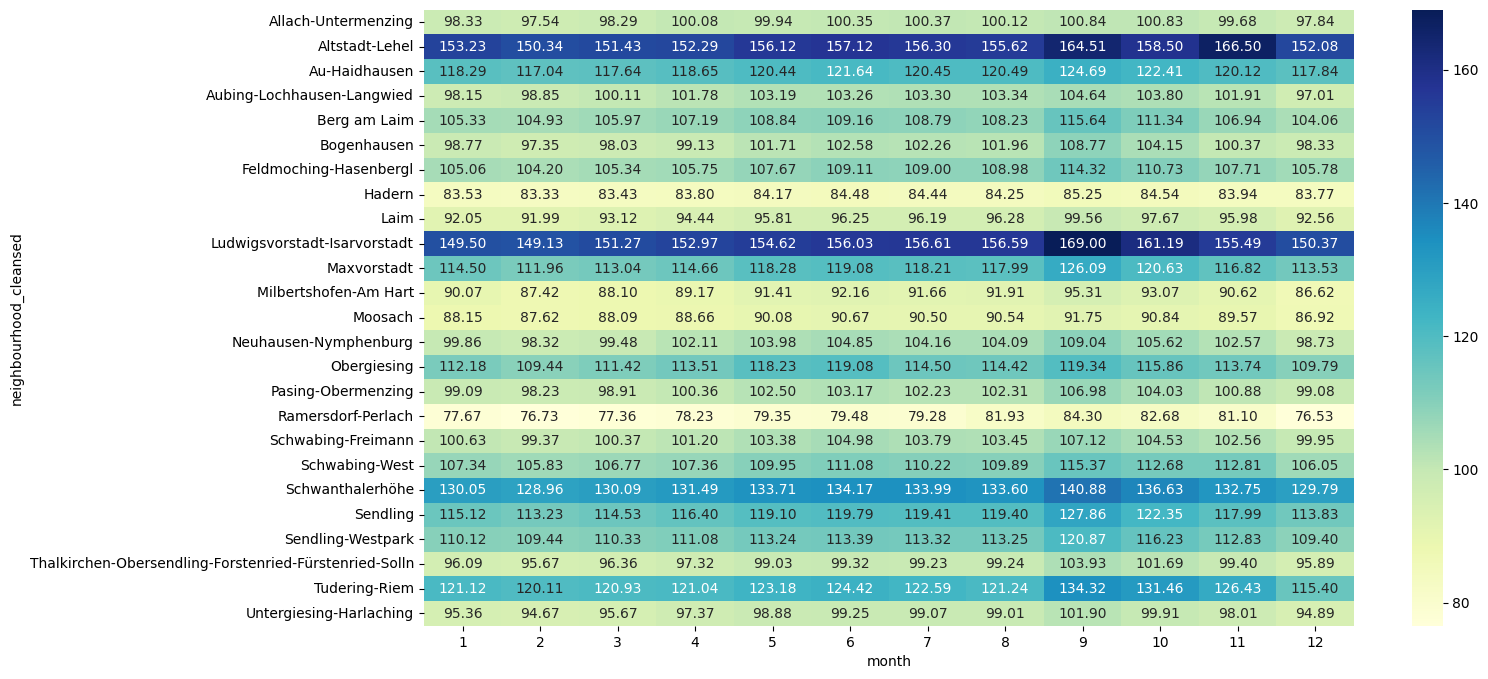

In [25]:
# pivot table for mean price per month and neighbourhood
pivot = df.pivot_table(values='price', index='neighbourhood_cleansed', columns = 'month', aggfunc = 'mean')

# heatmap
plt.figure(figsize=(15,8))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.2f', cbar=True)

plt.savefig('Pivot_price_month_neighbourhood.jpg')
plt.show()

We can clearly see, that `Altstadt-Lehel` and `Ludwigsvorstadt-Isarvorstadt` are the most expensive neighbourhoods. Where most neighbourhouds tend to get more expensive during september, there are some exceptions, e.g. `Hadern`.


## How is the correlation between price and other numerical features in general?

<function matplotlib.pyplot.show(close=None, block=None)>

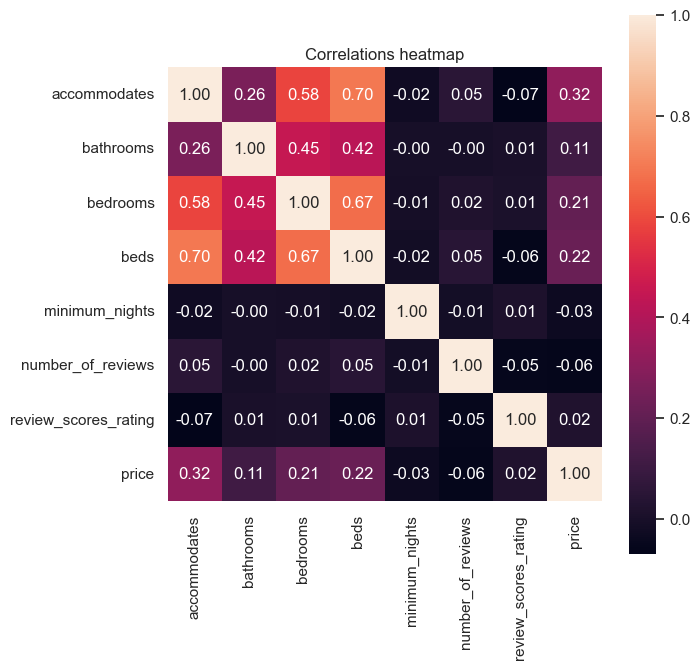

In [26]:
cols = ['accommodates','bathrooms','bedrooms','beds','minimum_nights',
        'number_of_reviews', 'review_scores_rating',
        'price']

corrs = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols, xticklabels = cols).set_title('Correlations heatmap')

fig = hm.get_figure()
fig.savefig('correlations.png')
plt.show

We can see a correlation between these features and the price and of course the correlation between the features too. For example 
- `accomodates` correlates of course to the number of `bedrooms` or `beds`
- the highest positive correlation to `price` has in that regard the `accomodates` column
- `minimum_nights` has as expected a negative correlation, however a small one
- it is a bit surprising tht the `number_of_reviews` has also a negative correlation to `price`
- the `rewiew_scores_rating` has only a rather small influence on `price`

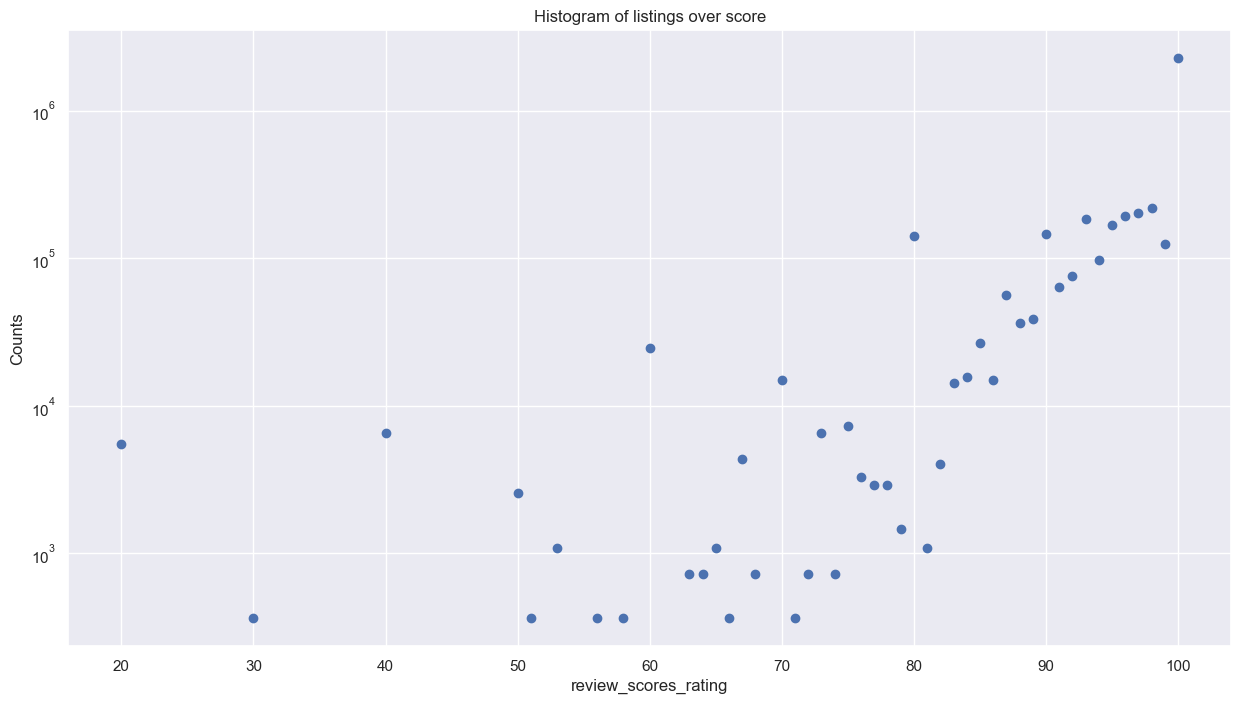

In [27]:
# is there a higher correlation for review_score and number of bookings for an accommodation?
# average price per listing
score_per_listing = df.groupby('review_scores_rating')['listing_id'].count().reset_index()
# print(score_per_listing)

plt.figure(figsize=(15,8))
plt.scatter(score_per_listing['review_scores_rating'] ,score_per_listing['listing_id'])
plt.yscale('log')

plt.xlabel('review_scores_rating')
plt.ylabel('Counts')
plt.title('Histogram of listings over score')
plt.savefig('Score_hist.jpg')
plt.show()

Whereas the score does not have a high influence on the pricing, it has an influence on the number of bookings. If a score is >70, the number of bookings increases exponentially.

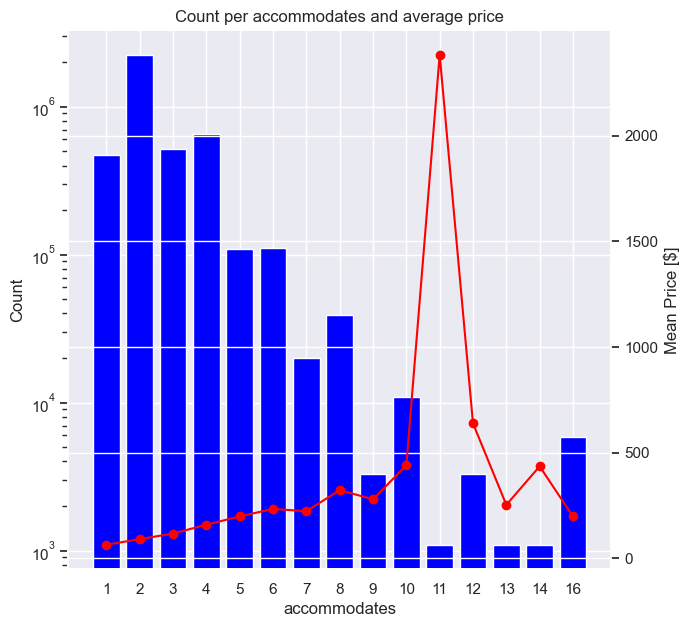

In [28]:
grouped = df.groupby(['accommodates']).agg({'price': ['count', 'mean']}).reset_index()
grouped.columns = ['accommodates', 'count', 'mean_price']


fig, ax1 = plt.subplots()
ax1.bar(grouped.index, grouped['count'], color='blue')
ax1.set_ylabel('Count')
plt.yscale('log')

ax2 = ax1.twinx()
ax2.plot(grouped.index, grouped['mean_price'], color='red', marker='o')
ax2.set_ylabel('Mean Price [$]')

ax1.set_xlabel('accommodates')
ax1.set_xticks(grouped.index)
ax1.set_xticklabels(grouped['accommodates'])

plt.title('Count per accommodates and average price')

plt.savefig('Count_MeanPrice_vs_accommodates.jpg')

plt.show()

Most accommodation have space for 1-4 people.
The price per accommodation rises linearly from 1-10, but there is a huge peak at 11. Why?

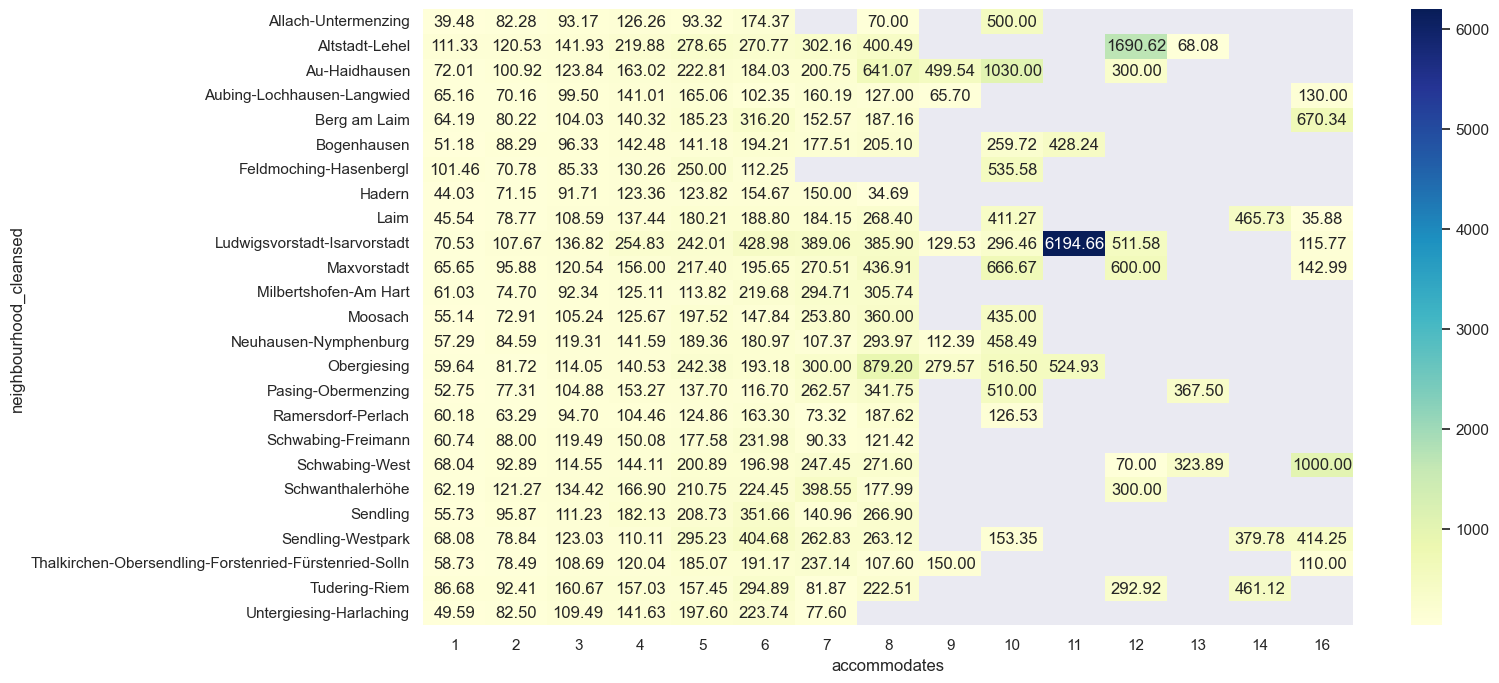

In [29]:
# pivot table for mean price per month and neighbourhood
pivot = df.pivot_table(values='price', index='neighbourhood_cleansed', columns = 'accommodates', aggfunc = 'mean')

# heatmap
plt.figure(figsize=(15,8))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.2f', cbar=True)

plt.savefig('Pivot_price_accomodates_neighbourhood.jpg')
plt.show()

This 3D distribution over neighbourhood and number of accommodates has a very high peak fpr `Ludwigsvorstadt-Isarvorstadt` and simultaneously with `11` accommodates.

## How is the correlation to some categorical features?

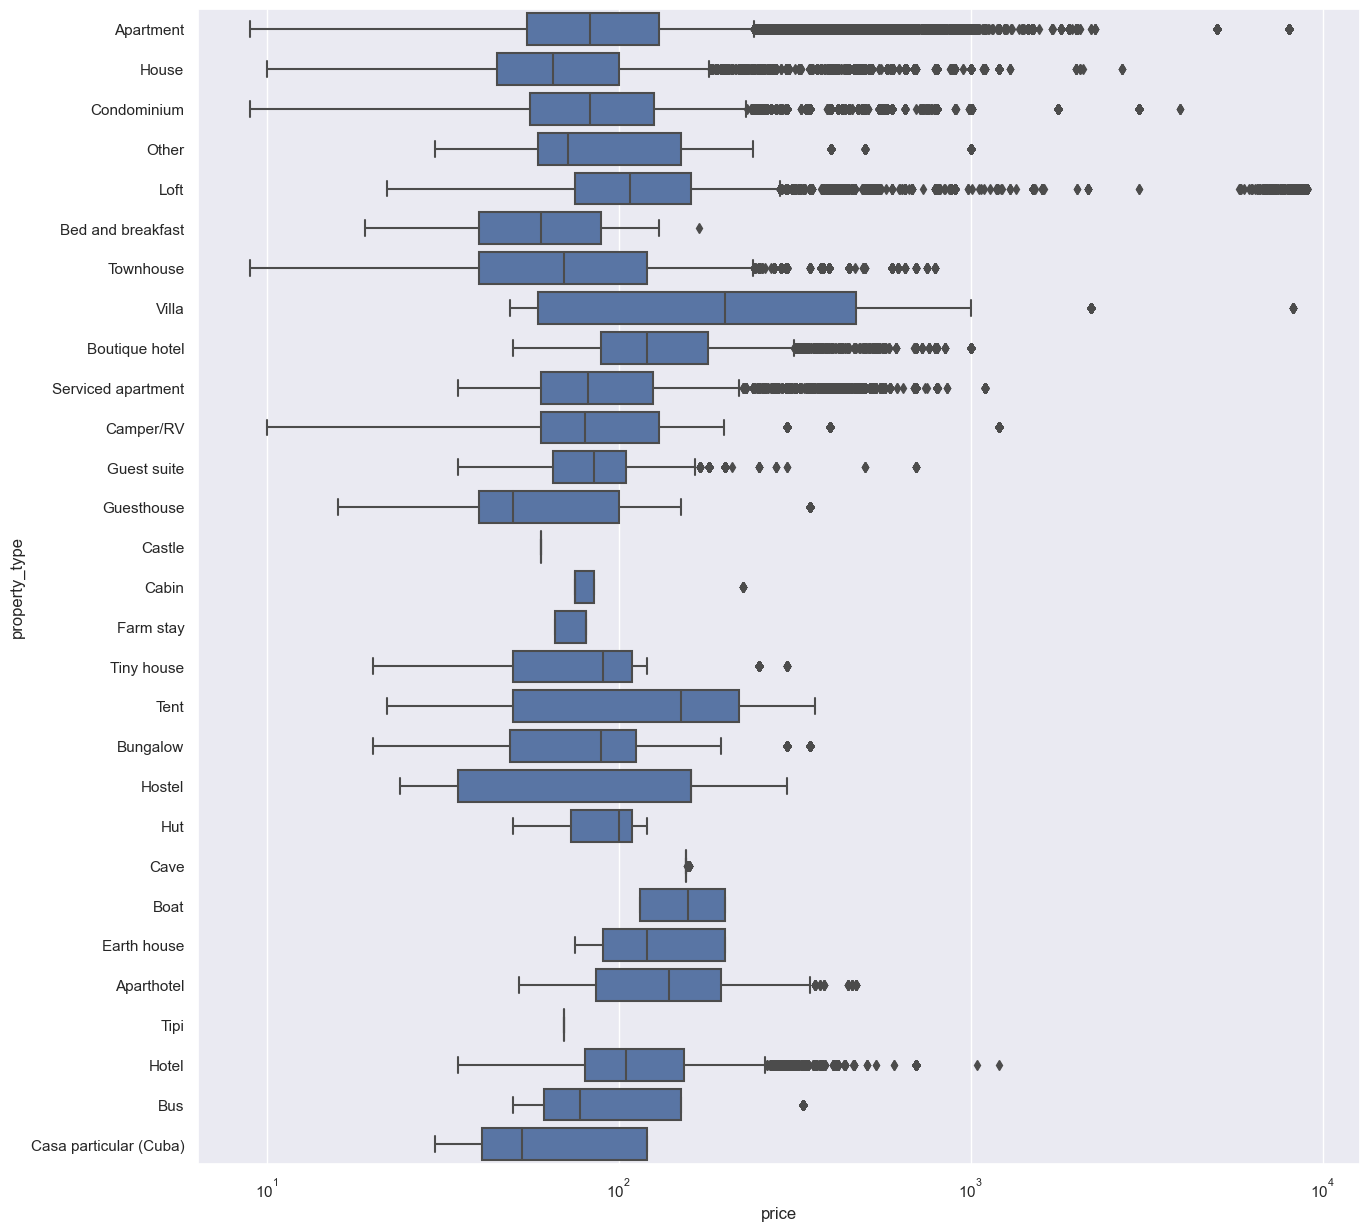

In [30]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df, x='price', y='property_type',color=sns.color_palette()[0]);
plt.xscale('log')
fig.savefig('boxplot_propertytype_price.png')

We can see lots of outlyers in the data, e.g. for `Loft`: whereas the mean is around 120 $, _max_ around 300 $, there are lots of higher values. Same applies for `Appartment`.
But in general some remarks:
- `Villas` tend to have higher prices
- `Hostels` tend to have lower prives
- There is a cheap `castle` available!

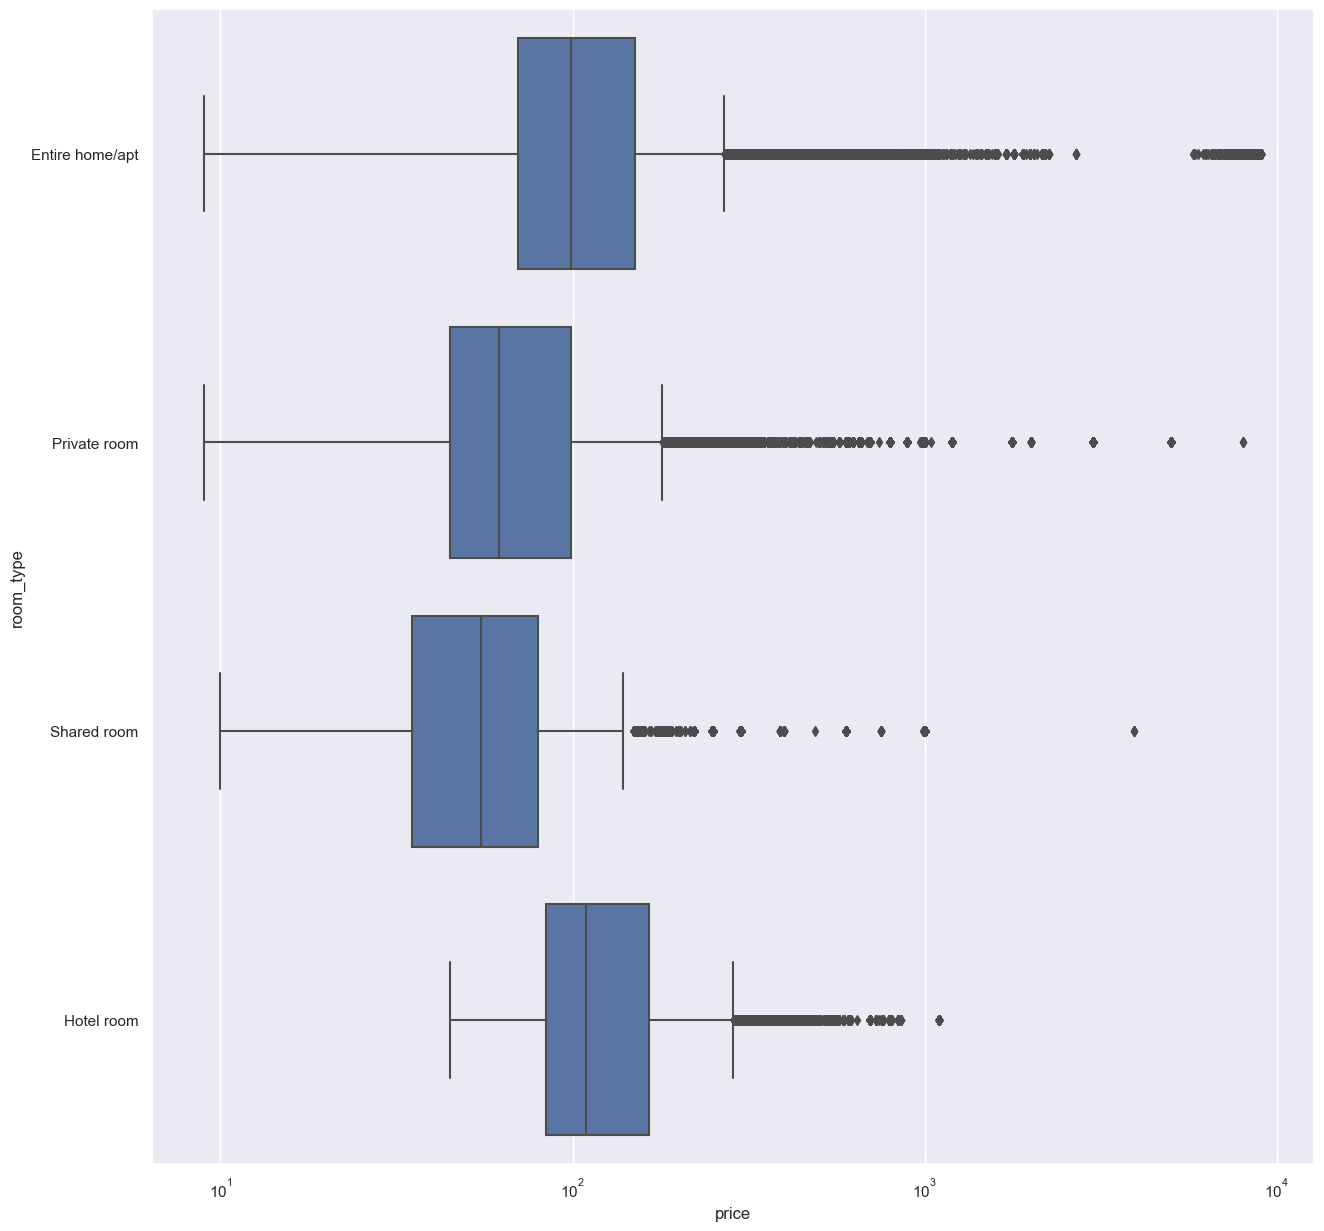

In [31]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df, x='price', y='room_type',color=sns.color_palette()[0]);
plt.xscale('log')
fig.savefig('boxplot_room_type_price.png')

As we can see, shared rooms have as expected the lowest prices and entire homes or hotels the highest.

## Some regression 
### first create dummy variables for the categorial ones

In [32]:
# split amenities into separate columns since there are 10695 individual entries

# empty list for various amenity "objects"
amenities_list = []

# how many different amenities are there?
for entry in df['amenities'].unique():
    for val in entry.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
        if val not in amenities_list:
            amenities_list.append(val)

# remove ''            
amenities_list.pop(0)            
            
# create new columns
for val in amenities_list:
    df['amenities_'+val] = df['amenities'].str.contains(val).astype(int)

# drop former column
df = df.drop(columns = ['amenities'])    

C:\Users\dbdrzij\AppData\Local\Temp\ipykernel_17308\3085219607.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['amenities_'+val] = df['amenities'].str.contains(val).astype(int)
C:\Users\dbdrzij\AppData\Local\Temp\ipykernel_17308\3085219607.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['amenities_'+val] = df['amenities'].str.contains(val).astype(int)
C:\Users\dbdrzij\AppData\Local\Temp\ipykernel_17308\3085219607.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['amenities_'+val] = df['amenities'].str.contains(val).astype(int)


In [33]:
# now it is getting tough for the amenities

# categoric_vars = df.select_dtypes(include=['object']).copy().columns
amen_cols = [col for col in df if col.startswith('amenities')]
amen_cors = df[amen_cols].corrwith(df['price'])
amen_cors = amen_cors.sort_values(ascending=False)

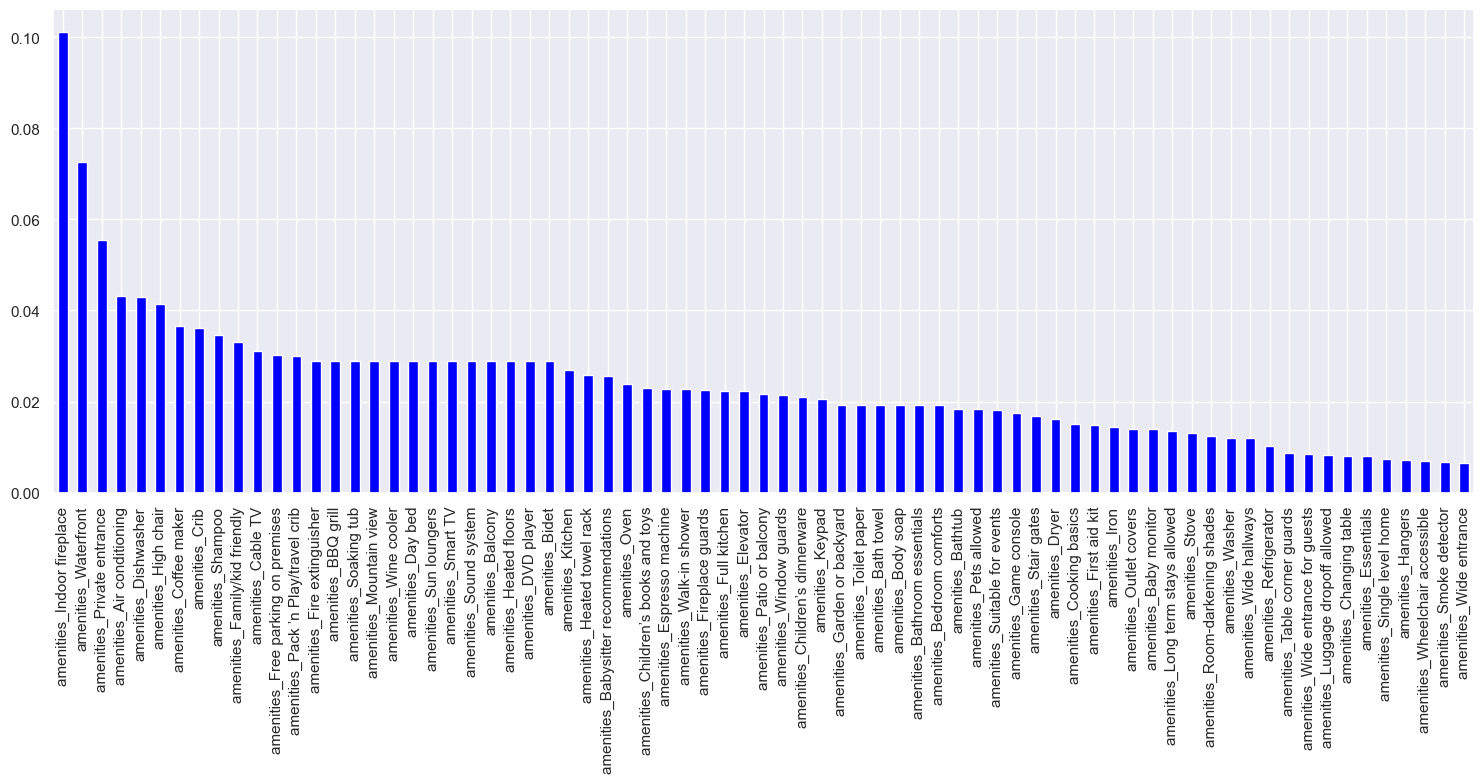

In [34]:
plt.figure(figsize=(15,8))
amen_cors[:73].plot(kind='bar', color='blue')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

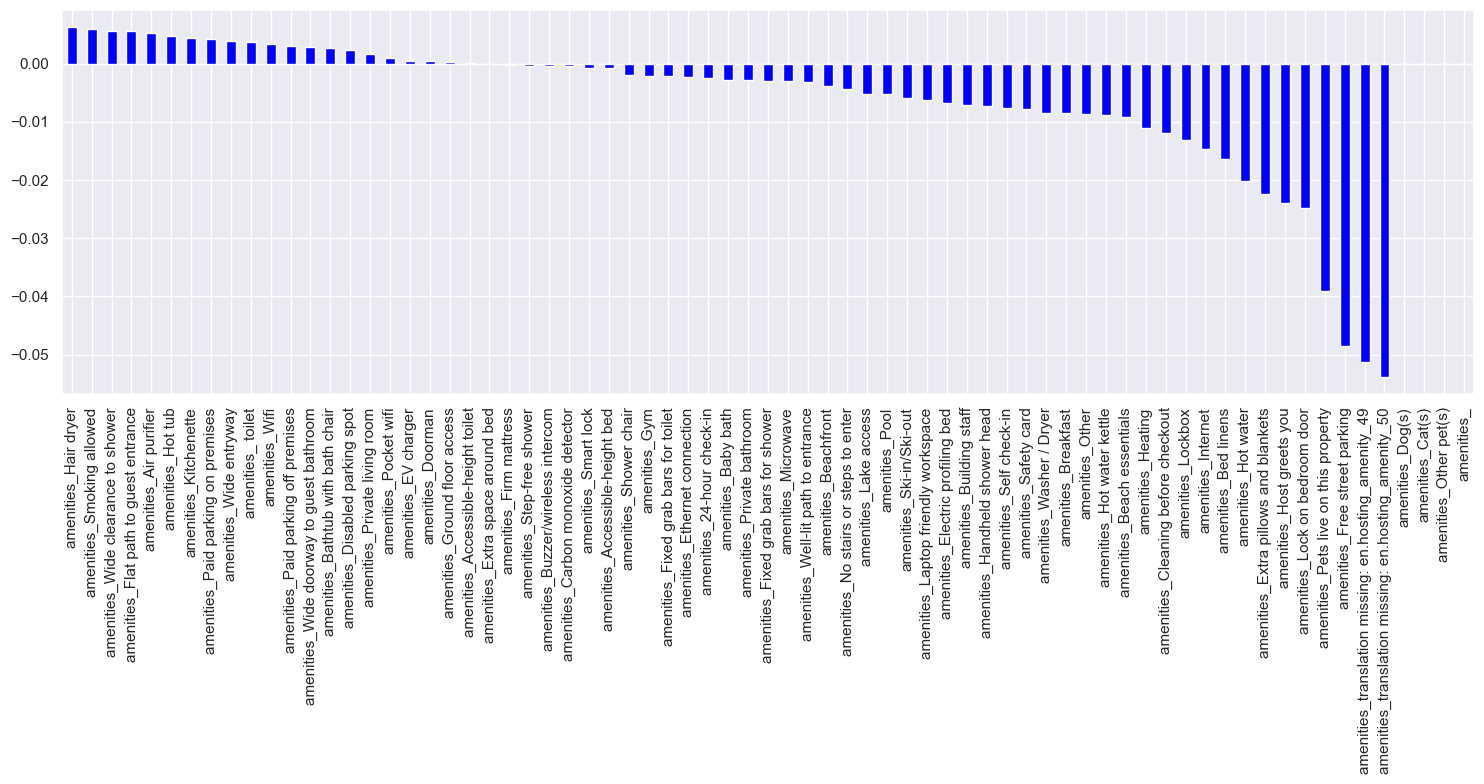

In [35]:
plt.figure(figsize=(15,8))
amen_cors[74:].plot(kind='bar', color='blue')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

As we can see, there are unfortunately lots of amenities. However, there are some trends.
E.g. and `indoor fireplace` or `waterfront` has a very positive effect on prices, whereas e.g. `pets live on this property` has a negative. In the end there are some amenities that should not be reviewed for a report.

In [36]:
# Dummy the categorical variables
cat_vars = df.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

In [37]:
# split into explanatory and response variables
X = df.drop(['listing_id', 'price'], axis=1)
y = df['price']

# split into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# initiate model
lm_model = LinearRegression(normalize=True)

# fit model
lm_model.fit(X_train, y_train) 

# Predict 
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score with model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.16472511896581954.  The rsquared on the test data was 0.1609772885059303.


## Conclusion
We tried to understand on basis of AirBnB data for munich, which features have a high influence on the accommodation prices for this city. Therefore we formulated 5 questions:

How large is the influence on munich airbnb accommodation prices for
1. Neighbourhood of the city
2. Time of the year
3. Ratings and reviews of the accommodation
4. Size, number of rooms and beds etc
5. Provided amenities

We can fairly clearly answer most of this questions.

1. The neighbourhood has a very high influence on the price. We identified top price regions like `Altstadt-Lehel` and `Ludwigsvorstadt-Isarvorstadt`, whereas there are also some rather cheap ones.
2. The time of the year has also a high impact on prices. Cheapest would be february. If you want some warm weather, it would be adviseable to visit in july. However, if you want to attend Oktoberfest, you will have to pay highest prices for the time of september.
3. The ratings and reviews have only small influence on the price. Whereas the score does not have a high influence on the pricing, it has an influence on the number of bookings. If a score is >70, the number of bookings increases exponentially.
4. Size could not be used directly, and most other related variables can be condensed to number of accommodates. The price per accommodation rises linearly from 1-10, then there is a peak due to highly biased data for a certain region of munich with 11 accomodates. Neglecting this, the trend is linearly rising from 1-12 accomodates. For more than >12 people the price seems to get lower.
5. As we can see, there are unfortunately lots of amenities. However, there are some trends.
E.g. and `indoor fireplace` or `waterfront` has a very positive effect on prices, whereas e.g. `pets live on this property` has a negative. In the end there are some amenities that should not be reviewed for a report.

## before finishing check this link
[project_deliverables](https://learn.udacity.com/nanodegrees/nd025/parts/cd0017/lessons/51712c62-ac79-46ca-9c4e-1817bd6fa5ac/concepts/a7b254ce-c6e8-4d12-b047-9dc85c28a27a)
